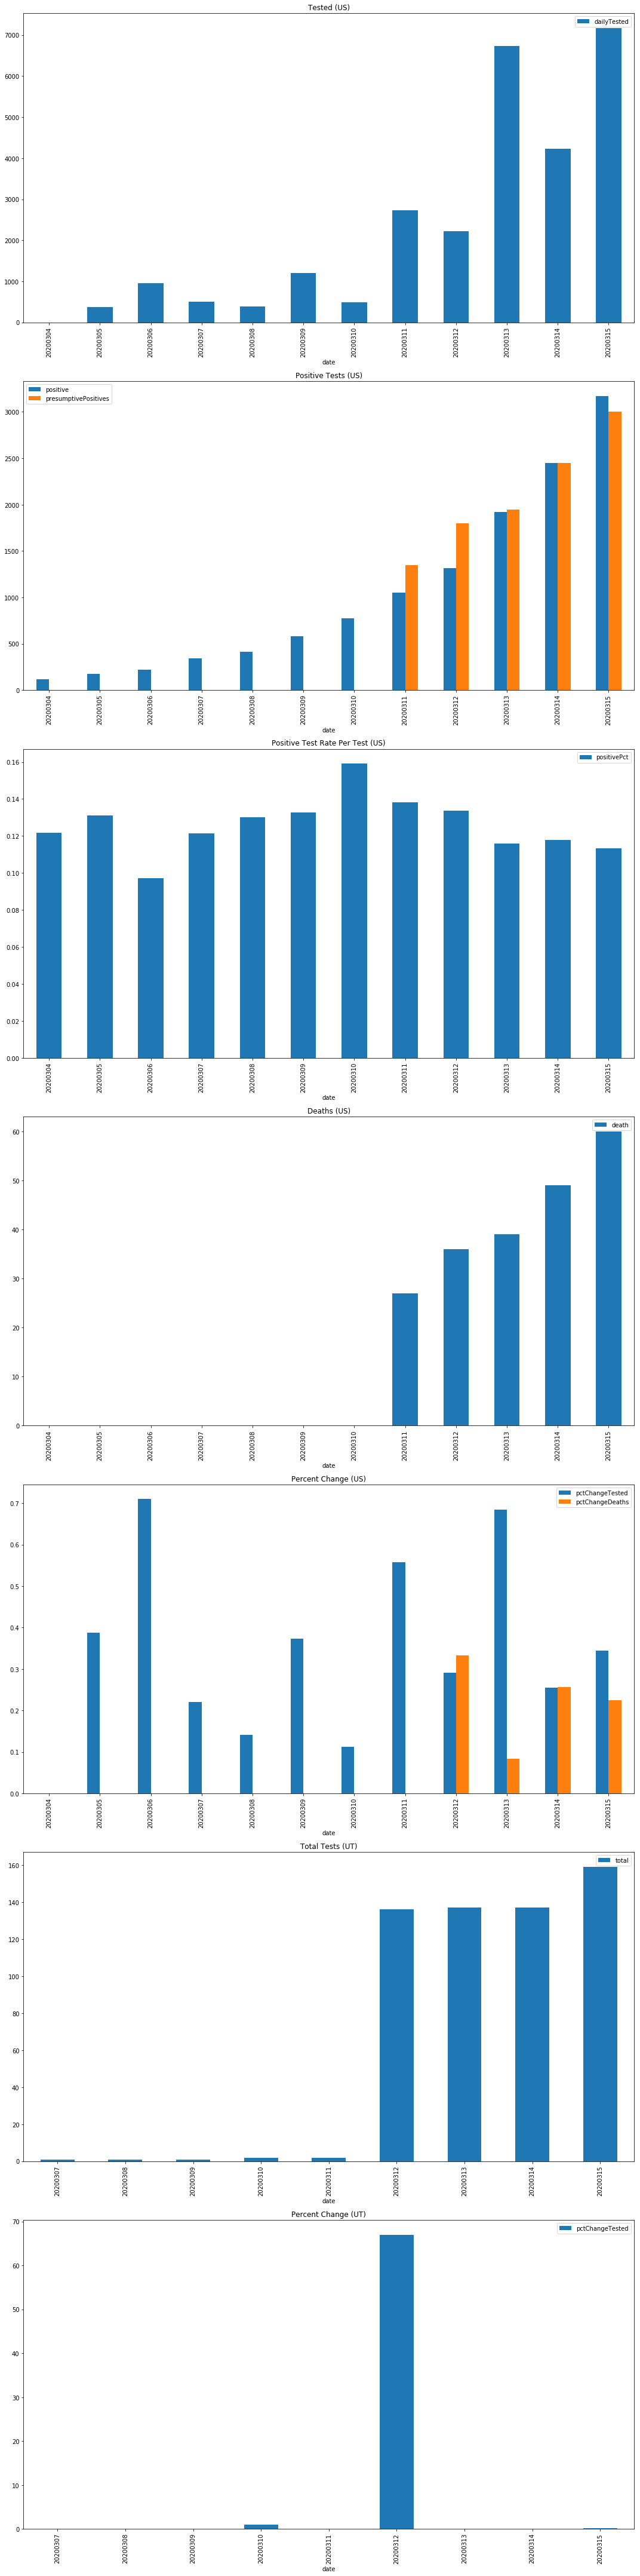

In [183]:
import httplib2
import json
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import numpy as np
import pandas as pd
from datetime import datetime

def convertToDate(s): 
    return datetime.strptime(str(s), '%Y%m%d')

countrySummary = 'https://covidtracking.com/api/us/daily'
statesCurrent = 'https://covidtracking.com/api/states/daily'
h = httplib2.Http('.cache')

# Create figure/axes
fig, (countryTested,countryPositives,countryPositivePct,countryDeaths,percAx,utahAx,utahPercAx) = plt.subplots(nrows=7,ncols=1,figsize=(15,60))

# Get state data
(response,stateDataRaw) = h.request(statesCurrent,'GET')
stateDataDf = pd.DataFrame(json.loads(stateDataRaw.decode('UTF-8')))
utahDataDf = stateData[stateData['state']=='UT'].sort_values(by=['date'])
utahDataDf['pctChangeTested'] = utahDataDf['total'].pct_change(fill_method='pad')
utahDataDf['pctChangeDeaths'] = utahDataDf['death'].pct_change(fill_method='pad')
utahDataDf['presumptivePositives'] = utahDataDf['death'].apply(lambda d: d/.02)

# Get US data       
(response,countryRaw) = h.request(countrySummary,'GET')
countryDf = pd.DataFrame(json.loads(countryRaw.decode('UTF-8')))
countryDf['pctChangeTested'] = countryDf['total'].pct_change(fill_method='pad')
countryDf['dailyTested'] = countryDf['total'].diff()
countryDf['pctChangeDeaths'] = countryDf['death'].pct_change(fill_method='pad')
countryDf['presumptivePositives'] = countryDf['death'].apply(lambda d:  d/.02)
countryDf['positivePct'] = countryDf.apply(lambda o: o['positive']/o['total'], axis=1)

# Draw country data
countryTested.set_title('Tested (US)')
countryPositives.set_title('Positive Tests (US)')
countryPositivePct.set_title('Positive Test Rate Per Test (US)')
countryDeaths.set_title('Deaths (US)')
percAx.set_title('Percent Change (US)')

countryDf[['date', 'dailyTested']].plot.bar(ax=countryTested,x='date')
countryDf[['date', 'positive', 'presumptivePositives']].plot.bar(ax=countryPositives,x='date')
countryDf[['date', 'positivePct']].plot.bar(ax=countryPositivePct,x='date')
countryDf[['date', 'death']].plot.bar(ax=countryDeaths,x='date')
countryDf[['date','pctChangeTested','pctChangeDeaths']].plot.bar(ax=percAx,x='date')                   

# Draw Utah data
utahAx.set_title('Total Tests (UT)')
utahPercAx.set_title('Percent Change (UT)')

utahDataDf[['date', 'total']].plot.bar(ax=utahAx,x='date')
utahDataDf[['date', 'pctChangeTested']].plot.bar(ax=utahPercAx,x='date')

fig.tight_layout()